<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Prediction model of HDB resale prices

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Preprocessing](#Preprocessing)
- [Modeling and Evaluation](#Modeling-and-Evaluation)
- [Conclusions](#Conclusions)
- [Applying Model to Data](#Apply-model-to-test-data)

## Background

Public housing in Singapore is subsidised, built and managed by the Government of Singapore. From the 1990s, the government began portraying public housing as an asset, introducing large-scale upgrading schemes and loosening regulations on the resale of public housing while additional housing programmes for the sandwich classes and elderly residents were introduced. Rising housing prices led to public housing being seen as an investment from the 2000s, and new technologies and eco-friendly features were incorporated into housing estates. As of 2020, 78.7% of Singapore residents live in public housing. (Source:https://en.wikipedia.org/wiki/Public_housing_in_Singapore)

## Problem Statement

A property consultancy has engaged you to write up an article on the key factors that affect the resale prices of HDB, to publish on their website.

This analysis aims to create a prediction model of resale prices that identifies the key features driving the prices.

## Data Import and Cleaning

In [1]:
#import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
#read data

house = pd.read_csv('../datasets/train.csv')

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_1957/1628987749.py:3: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  house = pd.read_csv('../datasets/train.csv')


In [3]:
#data preview

house.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


## Missing Values

In [4]:
#check data types and missing data

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

There are missing values for the following features.

1) Mall_Nearest_Distance
2) Mall_Within_500m
3) Mall_Within_1km
4) Mall_Within_2km
5) Hawker_Within_500m
6) Hawker_Within_1km
7) Hawker_Within_2km 

For 2-7, missing values can be interpretated as no mall/hawker within that range. Hence, we will replace missing values with 0.

In [5]:
#replace 2-7 missing values with 0.

missing = ['Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km']

for m in missing:
    house[m].fillna(0.0, inplace = True)

In [6]:
#check that replacement is successful.

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

Text(0.5, 1.0, 'Distance to Nearest Mall')

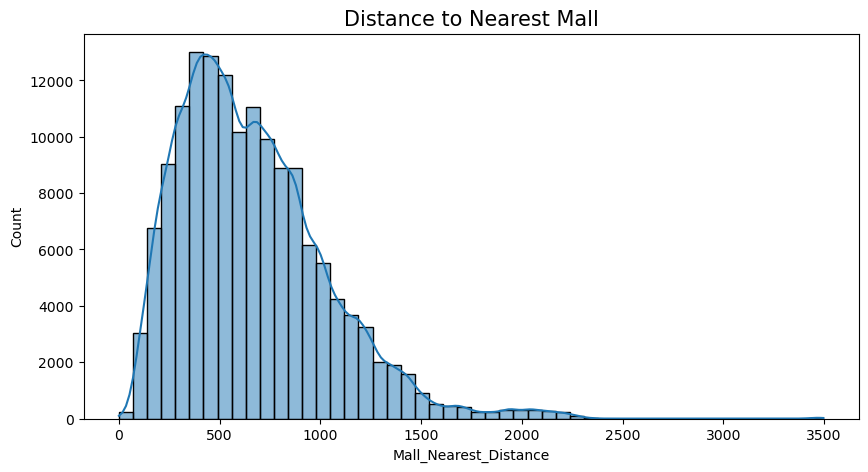

In [7]:
# For 1, plot a histogram to look at the distribution of values in Mall_Nearest_Distance:
plt.figure(figsize = (10, 5))
sns.histplot(data=house, x='Mall_Nearest_Distance', bins =50, kde=True)
plt.title('Distance to Nearest Mall', fontsize=15)

In [8]:
# since distribution is skewed, replace missing values with median
house['Mall_Nearest_Distance'].fillna(house['Mall_Nearest_Distance'].median(), inplace = True)

# check inputation is successful
house['Mall_Nearest_Distance'].isnull().sum()

0

## Exploratory Data Analysis

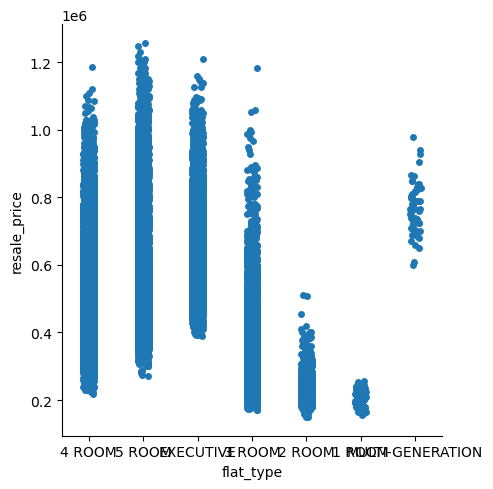

In [9]:
#Visualize relationship between flat type and resale price

sns.catplot(data=house, x="flat_type", y="resale_price")

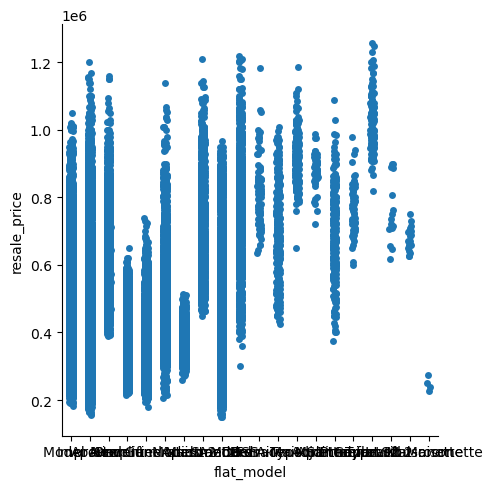

In [10]:
#Visualize relationship between flat model and resale price

sns.catplot(data=house, x="flat_model", y="resale_price")

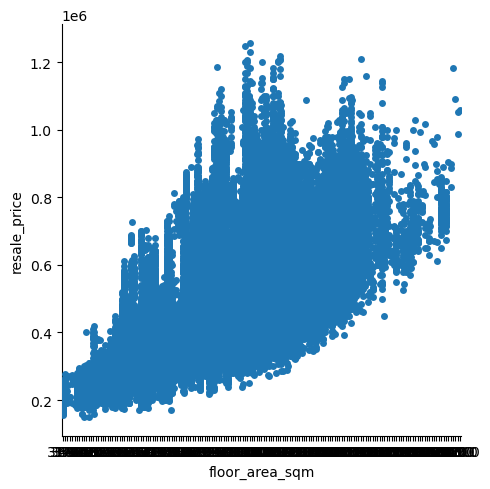

In [11]:
#Visualize relationship between floor area and resale price

sns.catplot(data=house, x="floor_area_sqm", y="resale_price")

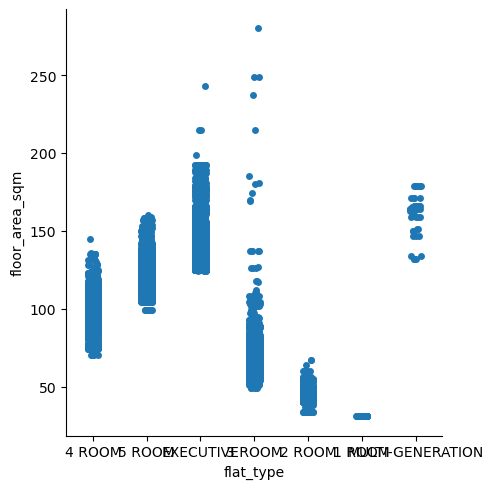

In [12]:
#Visualize relationship between flat type and floor area

sns.catplot(data=house, x="flat_type", y="floor_area_sqm")

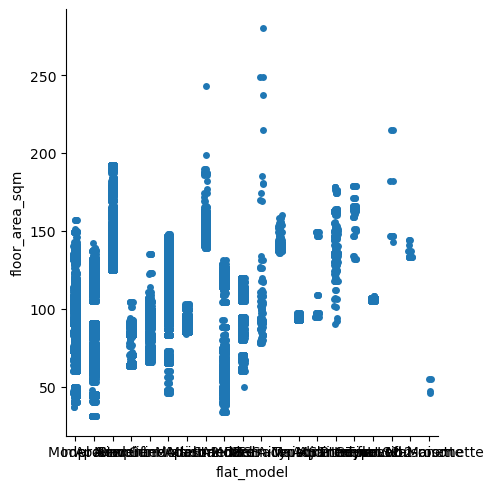

In [13]:
#Visualize relationship between flat model and floor area

sns.catplot(data=house, x="flat_model", y="floor_area_sqm")

Flat type/model are related to floor area, which should be the key feature to consider (shows greatest relation to resale price in chart).

<AxesSubplot: xlabel='max_floor_lvl', ylabel='resale_price'>

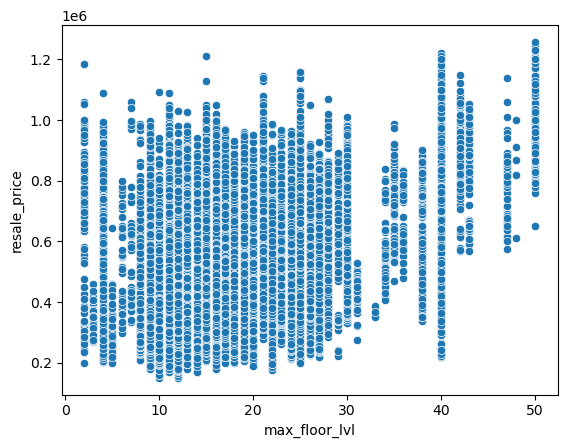

In [14]:
#Visualize relationship between max floor level and resale price

sns.scatterplot(data=house, x="max_floor_lvl", y="resale_price")

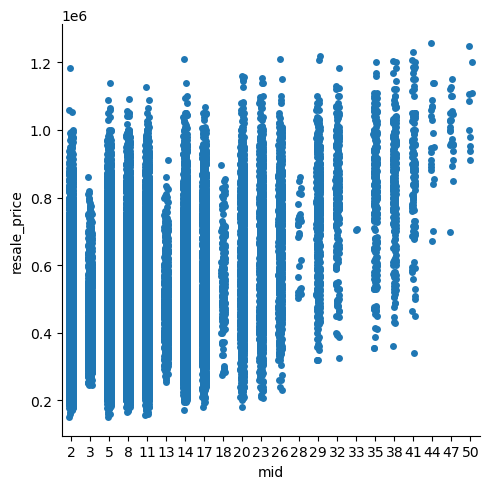

In [15]:
#Visualize relationship between mid and resale price

sns.catplot(data=house, x="mid", y="resale_price")

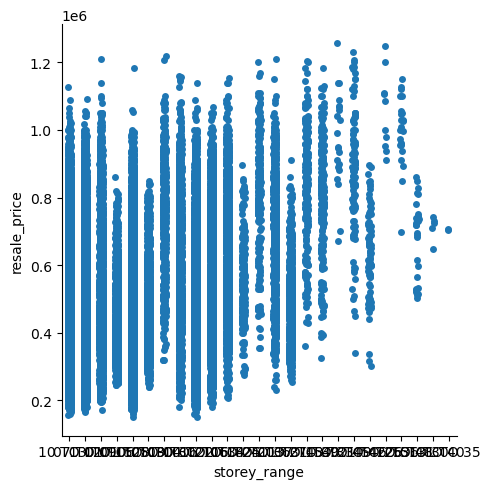

In [16]:
#Visualize relationship between storey range and resale price

sns.catplot(data=house, x="storey_range", y="resale_price")

Seems like resale price not really affected by max_floor level. mid and storey range are similar so we can just keep mid.

In [17]:
#Check if residential is over-represented by any value

house['residential'].unique()

array(['Y'], dtype=object)

## Preprocessing

In [18]:
#Feature Engineering to create remaining lease period which is potentially impactful on resale price

house['lease_remaining']=house['Tranc_Year'] - house['lease_commence_date']

## Remove features

1) We just need one feature for address, so keep town and remove block, street_name, address, latitude, longitude, postal, planning_area.
2) The storey range can be represented by mid (no overlaps between ranges), so keep mid and remove upper, lower, mid_storey, storey_range, max_floor_area.
3) Residential is all "Y", so we can drop it as it will not make a difference to our model.
4) Names, Latitudes and Longitudes, of mrt/bus_stops/schs are not of interest here so we can drop them. We are more interested in nearest distance of these amenities.
5) Already have Year and Month so we can drop YearMonth.
6) Drop id as it is not needed.
7) Floor_area is more important than the flat types/models so we can keep floor_area_sqm and drop flat_type, flat_model, full_flat_type, floor_area_sqft. 
8) Number of 1/2/3/4/5/exec/multigen/studio sold and rental data unlikely to be strong predictors, so we can drop them.
9) Keep lease_remaining and drop lease_commence_date, hdb_age, year_completed

In [19]:
house.drop(columns = ['block','street_name','address','Latitude','Longitude', 'postal',
                      'planning_area','upper','lower','mid_storey','storey_range',
                      'residential','mrt_name','mrt_latitude','mrt_longitude',
                      'bus_stop_name','bus_stop_latitude','bus_stop_longitude',
                      'pri_sch_name','pri_sch_latitude','pri_sch_longitude',
                      'sec_sch_name','sec_sch_latitude','sec_sch_longitude',
                     'id','Tranc_YearMonth', 'flat_type', 'flat_model','full_flat_type',
                     'floor_area_sqft', '1room_sold', '2room_sold', '3room_sold', 
                     '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
                     'studio_apartment_sold', '1room_rental', '2room_rental', 
                     '3room_rental', 'other_room_rental', 'lease_commence_date', 
                      'hdb_age', 'year_completed', 'max_floor_lvl'],inplace = True)

In [20]:
#check remaining features

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   town                       150634 non-null  object 
 1   floor_area_sqm             150634 non-null  float64
 2   resale_price               150634 non-null  float64
 3   Tranc_Year                 150634 non-null  int64  
 4   Tranc_Month                150634 non-null  int64  
 5   mid                        150634 non-null  int64  
 6   commercial                 150634 non-null  object 
 7   market_hawker              150634 non-null  object 
 8   multistorey_carpark        150634 non-null  object 
 9   precinct_pavilion          150634 non-null  object 
 10  total_dwelling_units       150634 non-null  int64  
 11  Mall_Nearest_Distance      150634 non-null  float64
 12  Mall_Within_500m           150634 non-null  float64
 13  Mall_Within_1km            15

In [21]:
#preview data to identify categorical features

pd.set_option('display.max_columns', None)
house.head()

,town,floor_area_sqm,resale_price,Tranc_Year,Tranc_Month,mid,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,lease_remaining
0,KALLANG/WHAMPOA,90.0,680000.0,2016,5,11,N,N,N,N,142,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,0,0,29.427395,1138.633422,78,1,1138.633422,224,0,10
1,BISHAN,130.0,665000.0,2012,7,8,N,N,N,N,112,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,1,1,58.207761,415.607357,45,1,447.894399,232,0,25
2,BUKIT BATOK,144.0,838000.0,2013,7,14,N,N,N,N,90,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,1,0,214.747860,498.849039,39,0,180.074558,188,0,16
3,BISHAN,103.0,550000.0,2012,4,3,Y,N,N,N,75,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,1,1,43.396521,389.515528,20,1,389.515528,253,1,20
4,YISHUN,83.0,298000.0,2017,12,2,N,N,N,N,48,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,0,0,129.422752,401.200584,74,0,312.025435,208,0,30


Check if categorical features are over-represented by any value

In [22]:
house['commercial'].value_counts()

N    121815
Y     28819
Name: commercial, dtype: int64

In [23]:
house['bus_interchange'].value_counts()

1    82301
0    68333
Name: bus_interchange, dtype: int64

In [24]:
house['mrt_interchange'].value_counts()

0    110863
1     39771
Name: mrt_interchange, dtype: int64

In [25]:
house['precinct_pavilion'].value_counts()

N    150499
Y       135
Name: precinct_pavilion, dtype: int64

In [26]:
house['multistorey_carpark'].value_counts()

N    150592
Y        42
Name: multistorey_carpark, dtype: int64

In [27]:
house['market_hawker'].value_counts()

N    150619
Y        15
Name: market_hawker, dtype: int64

In [28]:
house['pri_sch_affiliation'].value_counts()

0    133583
1     17051
Name: pri_sch_affiliation, dtype: int64

In [29]:
house['affiliation'].value_counts()

0    145832
1      4802
Name: affiliation, dtype: int64

Precinct_pavilion, multistorey_carpark, market_hawker, affiliation data are over-represented by 'N', could result in overfitting if we try to use them as features for our model. hence, we will drop.

In [30]:
house.drop(columns = ['affiliation', 'precinct_pavilion','market_hawker','multistorey_carpark'], inplace = True)

In [31]:
#Check remaining features

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   town                       150634 non-null  object 
 1   floor_area_sqm             150634 non-null  float64
 2   resale_price               150634 non-null  float64
 3   Tranc_Year                 150634 non-null  int64  
 4   Tranc_Month                150634 non-null  int64  
 5   mid                        150634 non-null  int64  
 6   commercial                 150634 non-null  object 
 7   total_dwelling_units       150634 non-null  int64  
 8   Mall_Nearest_Distance      150634 non-null  float64
 9   Mall_Within_500m           150634 non-null  float64
 10  Mall_Within_1km            150634 non-null  float64
 11  Mall_Within_2km            150634 non-null  float64
 12  Hawker_Nearest_Distance    150634 non-null  float64
 13  Hawker_Within_500m         15

In [32]:
house.town.unique()

array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
       'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
       'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
       'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
       'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
       'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object)

## Dummy code categorical features

In [33]:
house = pd.get_dummies(house,
                       columns=['commercial','town'],
                       drop_first = True)

In [34]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 52 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   floor_area_sqm             150634 non-null  float64
 1   resale_price               150634 non-null  float64
 2   Tranc_Year                 150634 non-null  int64  
 3   Tranc_Month                150634 non-null  int64  
 4   mid                        150634 non-null  int64  
 5   total_dwelling_units       150634 non-null  int64  
 6   Mall_Nearest_Distance      150634 non-null  float64
 7   Mall_Within_500m           150634 non-null  float64
 8   Mall_Within_1km            150634 non-null  float64
 9   Mall_Within_2km            150634 non-null  float64
 10  Hawker_Nearest_Distance    150634 non-null  float64
 11  Hawker_Within_500m         150634 non-null  float64
 12  Hawker_Within_1km          150634 non-null  float64
 13  Hawker_Within_2km          15

In [35]:
#Check total number of features

len(house.columns)

52

## Modeling and Evaluation

In [36]:
# import libraries:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [37]:
# Using mean for baseline model for prediction

y_bar = house['resale_price'].mean()

baseline_mse = np.mean((house['resale_price']-y_bar)**2)
baseline_rmse = np.sqrt(baseline_mse)

print('---------Baseline RMSE---------')
print(baseline_rmse)

---------Baseline RMSE---------
143307.09746102226


When we predict using mean, error of our predictions is 143k.

We can try to improve our predictions using the following models:

1) OLS regression
2) Ridge regression
3) Lasso regression
4) ElasticNet regression

In [38]:
# set up X and y variables:
X = house.drop(['resale_price'], axis = 'columns')
y = house['resale_price']


In [39]:
# split training and validation sets from train data, to create model using 80% of data and validate using 20%:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [40]:
# Scaling our data to standardize the range of values of features

ss= StandardScaler()

In [41]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

### Ordinary Least Squares Regression Model

In [42]:
#OLS regression

#Instantiate the model
lr = LinearRegression()

#Fit the model
lr.fit(X_train_ss,y_train)

print(lr.intercept_)
print(lr.coef_)

449417.3612598438
[103791.99148163  -2838.28665297  -2295.96288041  24364.30680554
   -732.75761166  -2413.49104097   2984.20110773   -717.76691539
  -4140.13121041 -16361.016424     2133.25296576   4026.52957037
  29366.33676099  -1155.47471211   7927.5794806  -24605.34955755
   4046.63062557   3525.1129361     181.80544178   3360.89950404
   1202.49747119   -129.27634927   4711.60164376  -1014.92247816
 -58681.52141047  -2969.21381305  -1255.71712727  14385.0071862
   2229.13635062   9568.18762022 -10884.13324318  10536.46349942
   9352.11316406 -12566.61114617   9526.36227033   2761.76959613
   1023.51720588  -1375.42095045 -14781.1271252    6983.02226174
  20182.70115453  -2469.15820802   2276.04758592  15227.11197401
 -15628.47228507  -4787.77201348  10252.49261418   4756.9451751
   8503.15133639 -25368.96393379  -7058.72836791]


In [43]:
y_pred = lr.predict(X_test_ss)

ols_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
ols_r2_test = lr.score(X_test_ss, y_test)
ols_r2_train = lr.score(X_train_ss, y_train)

print('---------OLS R2 (train)---------')
print(ols_r2_train)

print('---------OLS R2 (test)---------')
print(ols_r2_test)

print('---------OLS RMSE---------')
print(ols_rmse)

---------OLS R2 (train)---------
0.861604351820485
---------OLS R2 (test)---------
0.8607720639769438
---------OLS RMSE---------
53281.68985168486


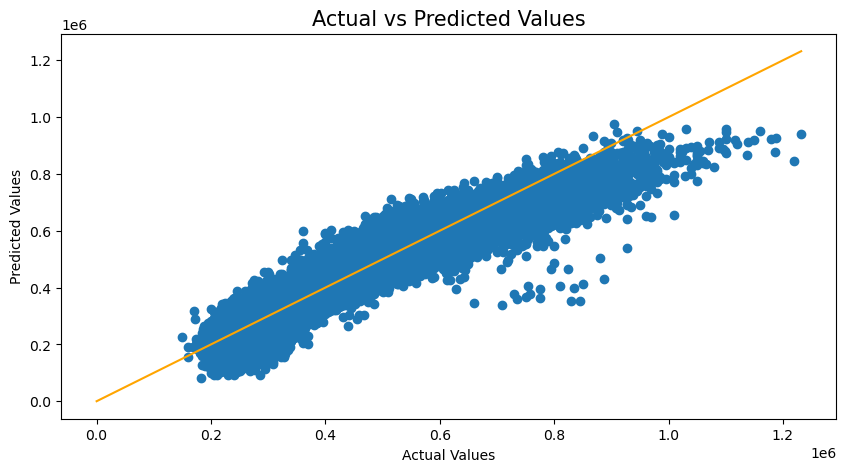

In [44]:
# Plot the actual y values against the predicted values
plt.figure(figsize = (10,5))

plt.scatter(y_test, y_pred)

# Line showing perfect predictions.
plt.plot([0, max(max(y_test),max(y_pred))],
         [0, max(max(y_test),max(y_pred))],
         linestyle = '-', color='orange')

plt.title('Actual vs Predicted Values', fontsize = 15)
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10);

OLS regression performed better than baseline model, with a smaller error of 53k and model accuracy of 86% on the validation data.
Predictions were also not biased towards any particular price ranges.

### Ridge Regression Model

In [45]:
#Ridge regression (base model)

ridge = Ridge(alpha=10)

ridge.fit(X_train_ss, y_train)

print('---------Ridge R2 (train)---------')
print(ridge.score(X_train_ss, y_train))

print('---------Ridge R2 (test)---------')
print(ridge.score(X_test_ss, y_test))

---------Ridge R2 (train)---------
0.8616043415478585
---------Ridge R2 (test)---------
0.8607716006124084


In [46]:
# RidgeCV

# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv.fit(X_train_ss, y_train)

# Here is the optimal value of alpha
ridge_cv.alpha_

11.497569953977356

In [47]:
#Ridge regression (optimal alpha)

ridge = Ridge(alpha=ridge_cv.alpha_)

ridge.fit(X_train_ss, y_train)

ridge_r2_train = ridge.score(X_train_ss, y_train)
ridge_r2_test = ridge.score(X_test_ss, y_test)

print('---------Ridge R2 (train)---------')
print(ridge_r2_train)

print('---------Ridge R2 (test)---------')
print(ridge_r2_test)

y_pred_ridge = ridge.predict(X_test_ss)

ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))

print('---------Ridge RMSE---------')
print(ridge_rmse)

---------Ridge R2 (train)---------
0.8616043382424211
---------Ridge R2 (test)---------
0.860771529350169
---------Ridge RMSE---------
53281.79215080483


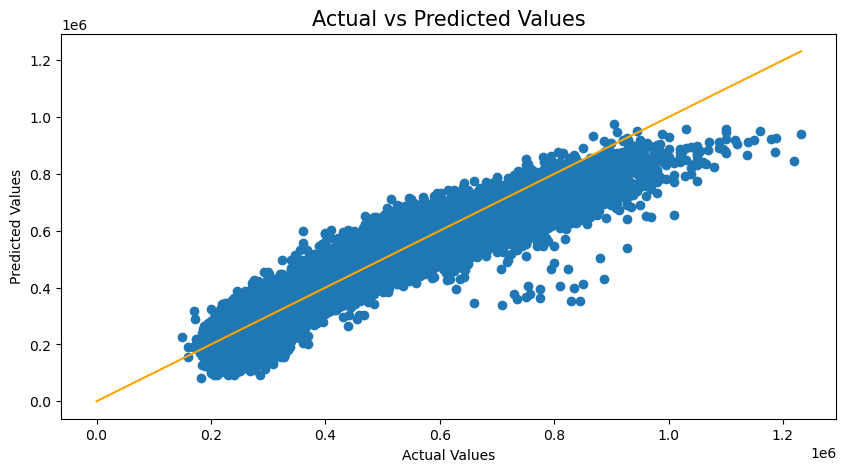

In [48]:
# Plot the actual y values against the predicted values
plt.figure(figsize = (10,5))

plt.scatter(y_test, y_pred_ridge)

# Line showing perfect predictions.
plt.plot([0, max(max(y_test),max(y_pred_ridge))],
         [0, max(max(y_test),max(y_pred_ridge))],
         linestyle = '-', color='orange')

plt.title('Actual vs Predicted Values', fontsize = 15)
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10);

Ridge regression performed better than baseline model, with a smaller error of 53k and model accuracy of 86% on the validation data.
Predictions were also not biased towards any particular price ranges.

### Lasso Regression Model

In [49]:
# LassoCV (optimal alpha)

# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-2, 5, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train_ss, y_train);

#optimal alpha
lasso_cv.alpha_

0.01

In [50]:
#Lasso regression (optimal alpha)

lasso = Lasso(alpha=lasso_cv.alpha_)

lasso.fit(X_train_ss, y_train)

lasso_r2_train = lasso.score(X_train_ss, y_train)
lasso_r2_test = lasso.score(X_test_ss, y_test)

print('---------Lasso R2 (train)---------')
print(lasso_r2_train)

print('---------Lasso R2 (test)---------')
print(lasso_r2_test)

y_pred_lasso = lasso.predict(X_test_ss)

lasso_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))

print('---------Lasso RMSE---------')
print(lasso_rmse)

---------Lasso R2 (train)---------
0.8616043518199973
---------Lasso R2 (test)---------
0.8607720570239812
---------Lasso RMSE---------
53281.69118211324


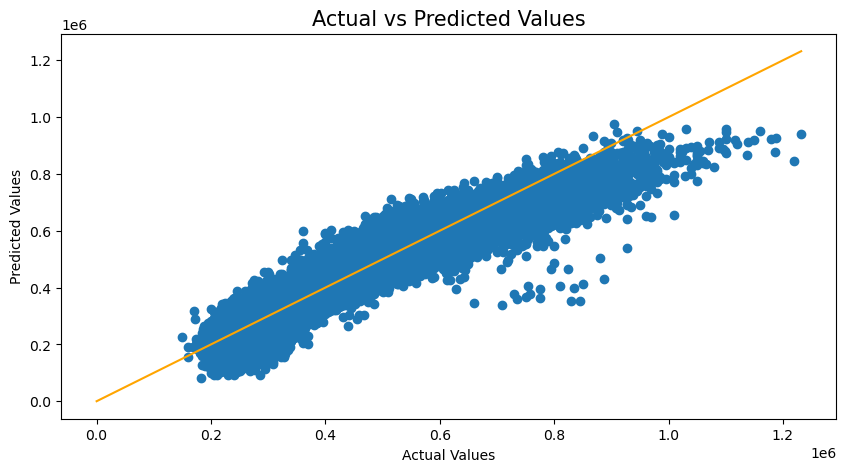

In [51]:
# Plot the actual y values against the predicted values
plt.figure(figsize = (10,5))

plt.scatter(y_test, y_pred_lasso)

# Line showing perfect predictions.
plt.plot([0, max(max(y_test),max(y_pred_lasso))],
         [0, max(max(y_test),max(y_pred_lasso))],
         linestyle = '-', color='orange')

plt.title('Actual vs Predicted Values', fontsize = 15)
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10);

Lasso regression performed better than baseline model, with a smaller error of 53k and model accuracy of 86% on the validation data.
Predictions were also not biased towards any particular price ranges.

### ElasticNet Regression Model

In [52]:
#ElasticNet CV

# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio. (What does this do?)
enet_ratio = 0.5

# Instantiate model.
enet = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet = enet.fit(X_train_ss, y_train)

# Generate predictions.
enet_r2_train = enet.score(X_train_ss,y_train)
enet_r2_test = enet.score(X_test_ss,y_test)

# Evaluate model.
print('---------ElasticNet R2 (train)---------')
print(enet_r2_train)

print('---------ElasticNet R2 (test)---------')
print(enet_r2_test)

y_pred_enet = enet.predict(X_test_ss)

enet_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_enet))

print('---------ElasticNet RMSE---------')
print(enet_rmse)

---------ElasticNet R2 (train)---------
0.8189408705337543
---------ElasticNet R2 (test)---------
0.8172969888516677
---------ElasticNet RMSE---------
61036.222882946284


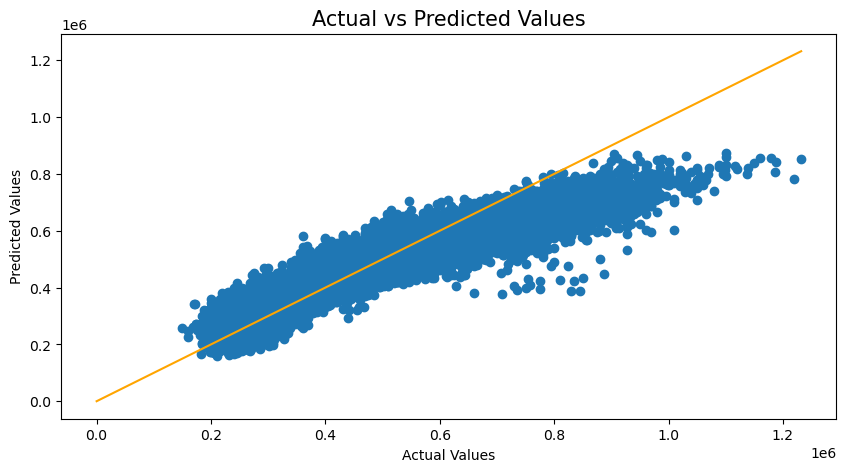

In [53]:
# Plot the actual y values against the predicted values
plt.figure(figsize = (10,5))

plt.scatter(y_test, y_pred_enet)

# Line showing perfect predictions.
plt.plot([0, max(max(y_test),max(y_pred_enet))],
         [0, max(max(y_test),max(y_pred_enet))],
         linestyle = '-', color='orange')

plt.title('Actual vs Predicted Values', fontsize = 15)
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10);

ElasticNet regression performed better than baseline model, with a smaller error of 61k and model accuracy of 81% on the validation data.
Predictions were also not biased towards any particular price ranges.

In [54]:
# Compare the performance of each model

print('-------OLS-------')
print(f'R2 (train) : {ols_r2_train}')
print(f'R2 (test) : {ols_r2_test}')
print(f'RMSE : {ols_rmse}')

print('-------Ridge-------')
print(f'R2 (train) : {ridge_r2_train}')
print(f'R2 (test) : {ridge_r2_test}')
print(f'RMSE : {ridge_rmse}')

print('-------Lasso-------')
print(f'R2 (train) : {lasso_r2_train}')
print(f'R2 (test) : {lasso_r2_test}')
print(f'RMSE : {lasso_rmse}')

print('-------ElasticNet-------')
print(f'R2 (train) : {enet_r2_train}')
print(f'R2 (test) : {enet_r2_test}')
print(f'RMSE : {enet_rmse}')

-------OLS-------
R2 (train) : 0.861604351820485
R2 (test) : 0.8607720639769438
RMSE : 53281.68985168486
-------Ridge-------
R2 (train) : 0.8616043382424211
R2 (test) : 0.860771529350169
RMSE : 53281.79215080483
-------Lasso-------
R2 (train) : 0.8616043518199973
R2 (test) : 0.8607720570239812
RMSE : 53281.69118211324
-------ElasticNet-------
R2 (train) : 0.8189408705337543
R2 (test) : 0.8172969888516677
RMSE : 61036.222882946284


OLS, Ridge, and Lasso performed very similarly in terms of error and model accuracy. Lets look at the top features identified by each model.

In [55]:
# Tag the feature names to the respective coefficients
ols_coeffs = pd.DataFrame({
    'Feature' : X.columns,
    'Coefficient' : lr.coef_,
    'Absolute Coefficient' : np.abs(lr.coef_)
})
# Sort the values by descending order
ols_coeffs.sort_values('Absolute Coefficient', ascending=False).head(15)

,Feature,Coefficient,Absolute Coefficient
0,floor_area_sqm,103791.991482,103791.991482
24,lease_remaining,-58681.521410,58681.521410
12,Hawker_Within_2km,29366.336761,29366.336761
49,town_WOODLANDS,-25368.963934,25368.963934
15,mrt_nearest_distance,-24605.349558,24605.349558
3,mid,24364.306806,24364.306806
40,town_MARINE PARADE,20182.701155,20182.701155
9,Hawker_Nearest_Distance,-16361.016424,16361.016424
44,town_SEMBAWANG,-15628.472285,15628.472285
43,town_QUEENSTOWN,15227.111974,15227.111974


In [56]:
# Tag the feature names to the respective coefficients
# Tag the feature names to the respective coefficients
ridge_coeffs = pd.DataFrame({
    'Feature' : X.columns,
    'Coefficient' : ridge.coef_,
    'Absolute Coefficient' : np.abs(ridge.coef_)
})
# Sort the values by descending order
ridge_coeffs.sort_values('Absolute Coefficient', ascending=False).head(15)

,Feature,Coefficient,Absolute Coefficient
0,floor_area_sqm,103778.986612,103778.986612
24,lease_remaining,-58671.063721,58671.063721
12,Hawker_Within_2km,29367.160535,29367.160535
49,town_WOODLANDS,-25354.713053,25354.713053
15,mrt_nearest_distance,-24601.633820,24601.633820
3,mid,24366.078907,24366.078907
40,town_MARINE PARADE,20180.633221,20180.633221
9,Hawker_Nearest_Distance,-16349.652029,16349.652029
44,town_SEMBAWANG,-15620.811913,15620.811913
43,town_QUEENSTOWN,15229.055577,15229.055577


In [57]:
# Tag the feature names to the respective coefficients
# Tag the feature names to the respective coefficients
lasso_coeffs = pd.DataFrame({
    'Feature' : X.columns,
    'Coefficient' : lasso.coef_,
    'Absolute Coefficient' : np.abs(lasso.coef_)
})
# Sort the values by descending order
lasso_coeffs.sort_values('Absolute Coefficient', ascending=False).head(15)

,Feature,Coefficient,Absolute Coefficient
0,floor_area_sqm,103791.981197,103791.981197
24,lease_remaining,-58681.495912,58681.495912
12,Hawker_Within_2km,29366.457715,29366.457715
49,town_WOODLANDS,-25368.912412,25368.912412
15,mrt_nearest_distance,-24605.335017,24605.335017
3,mid,24364.305494,24364.305494
40,town_MARINE PARADE,20182.688187,20182.688187
9,Hawker_Nearest_Distance,-16360.941641,16360.941641
44,town_SEMBAWANG,-15628.423363,15628.423363
43,town_QUEENSTOWN,15227.088450,15227.088450


Looking at the top 15 features from each model with highest coefficients, appears that apart from town, other important features are:

- floor_area_sqm
- lease_remaining
- Hawker_Within_2km
- mrt_nearest_distance
- mid
- Hawker_nearest_distance

Let's create interaction terms using these features and rerun our model.

In [58]:
# set up X and y variables:
house2 = house[['floor_area_sqm', 'lease_remaining', 'Hawker_Within_2km', 
                'mrt_nearest_distance', 'mid', 'Hawker_Nearest_Distance', 'resale_price']]


In [59]:
# Preview data

house2.head()

,floor_area_sqm,lease_remaining,Hawker_Within_2km,mrt_nearest_distance,mid,Hawker_Nearest_Distance,resale_price
0,90.0,10,13.0,330.083069,11,154.753357,680000.0
1,130.0,25,7.0,903.659703,8,640.151925,665000.0
2,144.0,16,1.0,1334.251197,14,1762.082341,838000.0
3,103.0,20,9.0,907.453484,3,726.215262,550000.0
4,83.0,30,1.0,412.343032,2,1540.151439,298000.0


/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_1957/2282068132.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(house2.corr(), dtype=np.bool)


<AxesSubplot: >

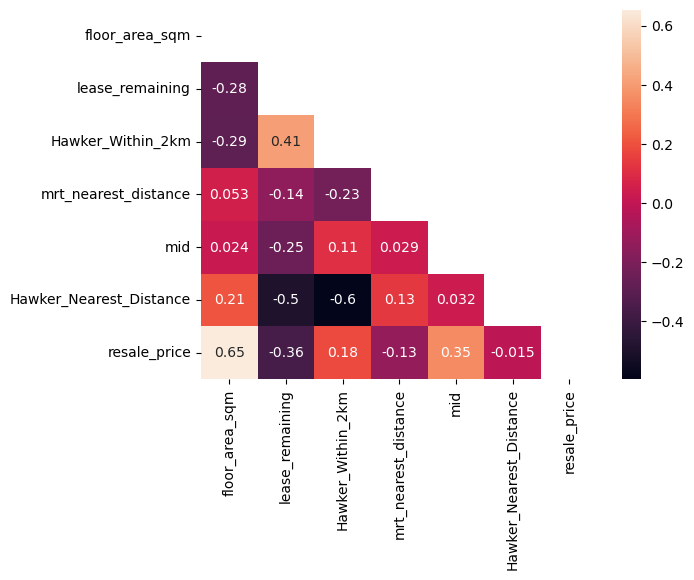

In [60]:
# Check correlations between features

mask = np.zeros_like(house2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(house2.corr(), mask = mask, annot=True)

In [61]:
# Set X and Y

X2 = house2.drop('resale_price', axis= 1)
y2 = house['resale_price']

In [62]:
# Create interaction terms for X

# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X2)

In [63]:
poly_names = poly.get_feature_names(X2.columns)

/opt/homebrew/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [64]:
X_overfit.shape

(150634, 27)

In [65]:
#Create new dataframe with interaction terms

X2 = pd.DataFrame(X_overfit, columns = [poly_names])

In [66]:
# Preview data

X2.head()

,floor_area_sqm,lease_remaining,Hawker_Within_2km,mrt_nearest_distance,mid,Hawker_Nearest_Distance,floor_area_sqm^2,floor_area_sqm lease_remaining,floor_area_sqm Hawker_Within_2km,floor_area_sqm mrt_nearest_distance,floor_area_sqm mid,floor_area_sqm Hawker_Nearest_Distance,lease_remaining^2,lease_remaining Hawker_Within_2km,lease_remaining mrt_nearest_distance,lease_remaining mid,lease_remaining Hawker_Nearest_Distance,Hawker_Within_2km^2,Hawker_Within_2km mrt_nearest_distance,Hawker_Within_2km mid,Hawker_Within_2km Hawker_Nearest_Distance,mrt_nearest_distance^2,mrt_nearest_distance mid,mrt_nearest_distance Hawker_Nearest_Distance,mid^2,mid Hawker_Nearest_Distance,Hawker_Nearest_Distance^2
0,90.0,10.0,13.0,330.083069,11.0,154.753357,8100.0,900.0,1170.0,29707.476210,990.0,13927.802157,100.0,130.0,3300.830690,110.0,1547.533573,169.0,4291.079897,143.0,2011.793645,1.089548e+05,3630.913759,5.108146e+04,121.0,1702.286930,2.394860e+04
1,130.0,25.0,7.0,903.659703,8.0,640.151925,16900.0,3250.0,910.0,117475.761377,1040.0,83219.750315,625.0,175.0,22591.492572,200.0,16003.798137,49.0,6325.617920,56.0,4481.063478,8.166009e+05,7229.277623,5.784795e+05,64.0,5121.215404,4.097945e+05
2,144.0,16.0,1.0,1334.251197,14.0,1762.082341,20736.0,2304.0,144.0,192132.172368,2016.0,253739.857104,256.0,16.0,21348.019152,224.0,28193.317456,1.0,1334.251197,14.0,1762.082341,1.780226e+06,18679.516758,2.351060e+06,196.0,24669.152774,3.104934e+06
3,103.0,20.0,9.0,907.453484,3.0,726.215262,10609.0,2060.0,927.0,93467.708842,309.0,74800.172017,400.0,180.0,18149.069678,60.0,14524.305246,81.0,8167.081355,27.0,6535.937361,8.234718e+05,2722.360452,6.590066e+05,9.0,2178.645787,5.273886e+05
4,83.0,30.0,1.0,412.343032,2.0,1540.151439,6889.0,2490.0,83.0,34224.471631,166.0,127832.569437,900.0,30.0,12370.290951,60.0,46204.543170,1.0,412.343032,2.0,1540.151439,1.700268e+05,824.686063,6.350707e+05,4.0,3080.302878,2.372066e+06


In [67]:
# Add town back into X

temp = pd.read_csv('../datasets/train.csv')
X2['town'] = temp['town']

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_1957/2988073402.py:3: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv('../datasets/train.csv')


In [68]:
# Dummy code for town

X2 = pd.get_dummies(X2,
                       columns=['town'],
                       drop_first = True)

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_1957/1278850797.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X2 = pd.get_dummies(X2,


In [69]:
# split training and validation sets from train data, using 80% of data to create model, and 20% to validate:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                                    y2,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [70]:
# Scale the data so that range of values of features are standardized

ss= StandardScaler()

In [71]:
X2_train_ss = ss.fit_transform(X2_train)
X2_test_ss = ss.transform(X2_test)

/opt/homebrew/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


### OLS Regression Model (Round 2)

In [72]:
#OLS regression

#Instantiate the model
lr2 = LinearRegression()

#Fit the model
lr2.fit(X2_train_ss,y2_train)

print(lr2.intercept_)
print(lr2.coef_)

449417.36125984386
[ 3.15477868e+04 -7.91731770e+04 -4.09088426e+04 -5.22518745e+04
 -4.70828239e+03 -2.73449150e+04  5.31617100e+04 -9.10800703e+03
  6.71394421e+04 -1.39016779e+04  3.59393588e+04  1.00579879e+04
  3.73313080e+04 -1.88211737e+04  2.03577825e+04 -5.30425972e+03
 -7.70925090e+03  6.54745173e+03 -3.35713004e+03  3.14772419e+03
  2.65380884e+03  1.96406638e+04  8.45767246e+00  1.95990725e+04
  6.30877005e+02 -9.33716298e+03  3.61955077e+03 -4.12932864e+03
  1.12270626e+04 -3.92295759e+03  8.24813182e+03 -1.26757975e+04
  9.14707828e+03  8.89015250e+03 -1.47774464e+04  7.61209030e+03
 -2.51272504e+02 -4.83725753e+03 -4.49202136e+03 -2.03726264e+04
  3.01303440e+03  1.34798160e+04 -5.63146715e+03 -6.53568608e+03
  1.21209602e+04 -1.76672503e+04 -1.25201879e+04  5.59940123e+03
 -3.01577105e+03  3.93126092e+03 -3.40341889e+04 -1.40077885e+04]


In [73]:
y2_pred = lr2.predict(X2_test_ss)

ols2_rmse = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))
ols2_r2_test = lr2.score(X2_test_ss, y2_test)
ols2_r2_train = lr2.score(X2_train_ss, y2_train)

print('---------OLS R2 (train)---------')
print(ols2_r2_train)

print('---------OLS R2 (test)---------')
print(ols2_r2_test)

print('---------OLS RMSE---------')
print(ols2_rmse)

---------OLS R2 (train)---------
0.8792451908590708
---------OLS R2 (test)---------
0.8777536566969599
---------OLS RMSE---------
49926.68560669114


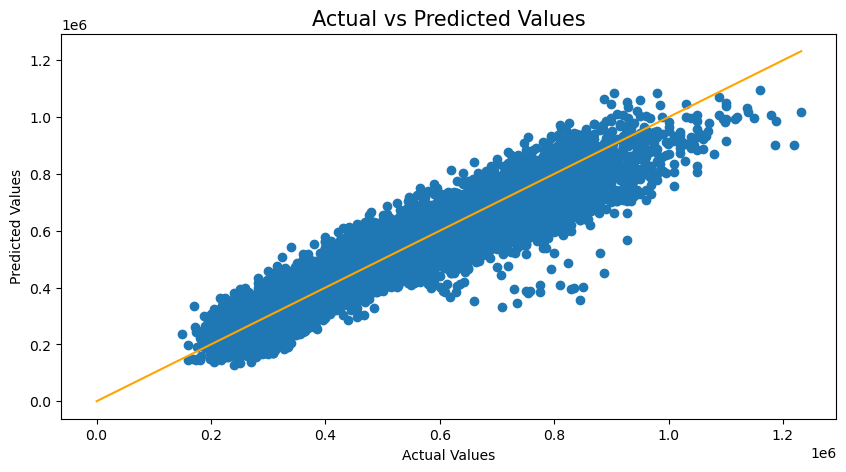

In [74]:
# Plot the actual y values against the predicted values
plt.figure(figsize = (10,5))

plt.scatter(y2_test, y2_pred)

# Line showing perfect predictions.
plt.plot([0, max(max(y2_test),max(y2_pred))],
         [0, max(max(y2_test),max(y2_pred))],
         linestyle = '-', color='orange')

plt.title('Actual vs Predicted Values', fontsize = 15)
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10);

### Ridge Regression Model (Round 2)

In [75]:
#Ridge regression (base model)

ridge2 = Ridge(alpha=10)

ridge2.fit(X2_train_ss, y2_train)

print('---------Ridge R2 (train)---------')
print(ridge2.score(X2_train_ss, y2_train))

print('---------Ridge R2 (test)---------')
print(ridge2.score(X2_test_ss, y2_test))

---------Ridge R2 (train)---------
0.8792442275017336
---------Ridge R2 (test)---------
0.8777484417336493


In [76]:
# RidgeCV

# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv2 = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv2.fit(X2_train_ss, y2_train)

# Here is the optimal value of alpha
ridge_cv2.alpha_

5.094138014816379

In [77]:
#Ridge regression (optimal alpha)

ridge2 = Ridge(alpha=ridge_cv2.alpha_)

ridge2.fit(X2_train_ss, y2_train)

ridge2_r2_train = ridge2.score(X2_train_ss, y2_train)
ridge2_r2_test = ridge2.score(X2_test_ss, y2_test)

print('---------Ridge R2 (train)---------')
print(ridge2_r2_train)

print('---------Ridge R2 (test)---------')
print(ridge2_r2_test)

y2_pred_ridge = ridge2.predict(X2_test_ss)

ridge2_rmse = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_ridge))

print('---------Ridge RMSE---------')
print(ridge2_rmse)

---------Ridge R2 (train)---------
0.8792449354332882
---------Ridge R2 (test)---------
0.8777512030093102
---------Ridge RMSE---------
49927.18666003084


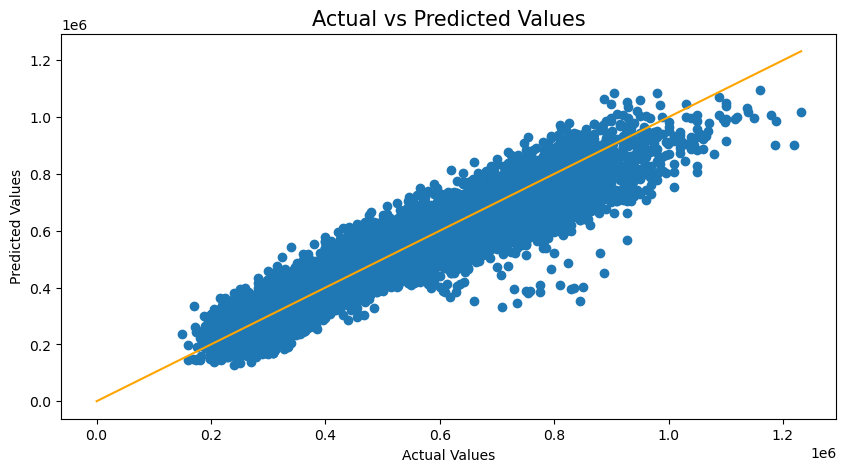

In [78]:
# Plot the actual y values against the predicted values
plt.figure(figsize = (10,5))

plt.scatter(y2_test, y2_pred_ridge)

# Line showing perfect predictions.
plt.plot([0, max(max(y2_test),max(y2_pred_ridge))],
         [0, max(max(y2_test),max(y2_pred_ridge))],
         linestyle = '-', color='orange')

plt.title('Actual vs Predicted Values', fontsize = 15)
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10);

### Lasso Regression Model (Round 2)

In [79]:
# LassoCV (optimal alpha)

# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-2, 5, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv2 = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best ridge alpha!
lasso_cv2.fit(X2_train_ss, y2_train);

#optimal alpha
lasso_cv2.alpha_

0.5857020818056664

In [80]:
#Lasso regression (optimal alpha)

lasso2 = Lasso(alpha=lasso_cv2.alpha_)

lasso2.fit(X2_train_ss, y2_train)

lasso2_r2_train = lasso2.score(X2_train_ss, y2_train)
lasso2_r2_test = lasso2.score(X2_test_ss, y2_test)

print('---------Lasso R2 (train)---------')
print(lasso2_r2_train)

print('---------Lasso R2 (test)---------')
print(lasso2_r2_test)

y2_pred_lasso = lasso2.predict(X2_test_ss)

lasso2_rmse = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_lasso))

print('---------Lasso RMSE---------')
print(lasso2_rmse)

---------Lasso R2 (train)---------
0.8792451327443147
---------Lasso R2 (test)---------
0.8777531244228806
---------Lasso RMSE---------
49926.79429972429


/opt/homebrew/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.639e+13, tolerance: 2.479e+11
  model = cd_fast.enet_coordinate_descent(


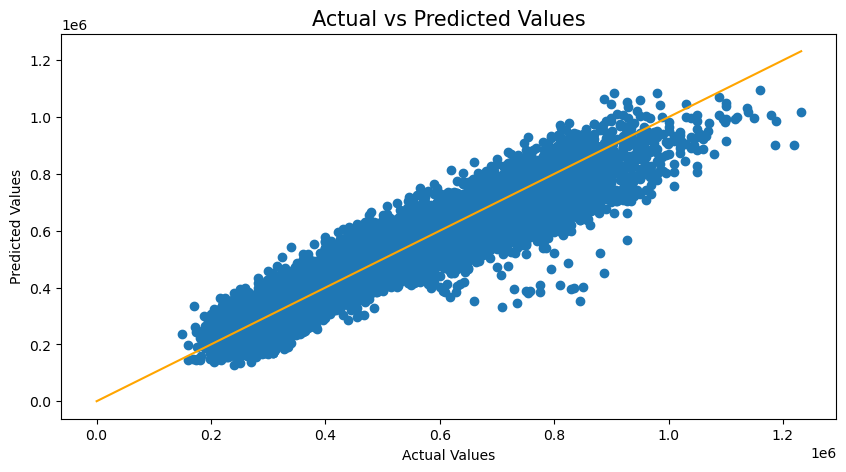

In [81]:
# Plot the actual y values against the predicted values
plt.figure(figsize = (10,5))

plt.scatter(y2_test, y2_pred_lasso)

# Line showing perfect predictions.
plt.plot([0, max(max(y2_test),max(y2_pred_lasso))],
         [0, max(max(y2_test),max(y2_pred_lasso))],
         linestyle = '-', color='orange')

plt.title('Actual vs Predicted Values', fontsize = 15)
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10);

### ElasticNet Regression Model (Round 2)

In [82]:
#ElasticNet CV

# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio. (What does this do?)
enet_ratio = 0.5

# Instantiate model.
enet2 = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet2 = enet2.fit(X2_train_ss, y2_train)

# Generate predictions.
enet2_r2_train = enet2.score(X2_train_ss,y2_train)
enet2_r2_test = enet2.score(X2_test_ss,y2_test)

# Evaluate model.
print('---------ElasticNet R2 (train)---------')
print(enet2_r2_train)

print('---------ElasticNet R2 (test)---------')
print(enet2_r2_test)

y2_pred_enet = enet2.predict(X2_test_ss)

enet2_rmse = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred_enet))

print('---------ElasticNet RMSE---------')
print(enet2_rmse)

---------ElasticNet R2 (train)---------
0.8518937322654475
---------ElasticNet R2 (test)---------
0.8506011968254495
---------ElasticNet RMSE---------
55193.553622659834


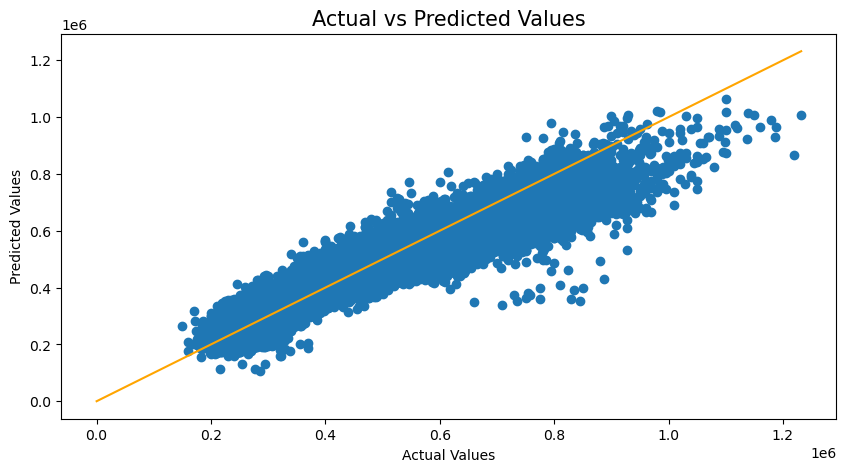

In [83]:
# Plot the actual y values against the predicted values
plt.figure(figsize = (10,5))

plt.scatter(y2_test, y2_pred_enet)

# Line showing perfect predictions.
plt.plot([0, max(max(y2_test),max(y2_pred_enet))],
         [0, max(max(y2_test),max(y2_pred_enet))],
         linestyle = '-', color='orange')

plt.title('Actual vs Predicted Values', fontsize = 15)
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10);

In [84]:
# Compare and evaluate the models

print('-------OLS-------')
print(f'R2 (train) : {ols2_r2_train}')
print(f'R2 (test) : {ols2_r2_test}')
print(f'RMSE : {ols2_rmse}')

print('-------Ridge-------')
print(f'R2 (train) : {ridge2_r2_train}')
print(f'R2 (test) : {ridge2_r2_test}')
print(f'RMSE : {ridge2_rmse}')

print('-------Lasso-------')
print(f'R2 (train) : {lasso2_r2_train}')
print(f'R2 (test) : {lasso2_r2_test}')
print(f'RMSE : {lasso2_rmse}')

print('-------ElasticNet-------')
print(f'R2 (train) : {enet2_r2_train}')
print(f'R2 (test) : {enet2_r2_test}')
print(f'RMSE : {enet2_rmse}')

-------OLS-------
R2 (train) : 0.8792451908590708
R2 (test) : 0.8777536566969599
RMSE : 49926.68560669114
-------Ridge-------
R2 (train) : 0.8792449354332882
R2 (test) : 0.8777512030093102
RMSE : 49927.18666003084
-------Lasso-------
R2 (train) : 0.8792451327443147
R2 (test) : 0.8777531244228806
RMSE : 49926.79429972429
-------ElasticNet-------
R2 (train) : 0.8518937322654475
R2 (test) : 0.8506011968254495
RMSE : 55193.553622659834


OLS, Ridge, and Lasso performed very similarly again in terms of error and model accuracy, and slightly better than the first round. We will use OLS as our model as it has the lowest error and highest accuracy, and also since there is no significant improvement using ridge or lasso models, we will fall back on our base regression model.

In [85]:
# Check the top features identified by OLS

# Tag the feature names to the respective coefficients
ols2_coeffs = pd.DataFrame({
    'Feature' : X2.columns,
    'Coefficient' : lr2.coef_,
    'Absolute Coefficient' : np.abs(lr2.coef_)
})
# Sort the values by descending order
ols2_coeffs.sort_values('Absolute Coefficient', ascending=False).head(15)

,Feature,Coefficient,Absolute Coefficient
1,"(lease_remaining,)",-79173.177022,79173.177022
8,"(floor_area_sqm Hawker_Within_2km,)",67139.442085,67139.442085
6,"(floor_area_sqm^2,)",53161.709958,53161.709958
3,"(mrt_nearest_distance,)",-52251.874529,52251.874529
2,"(Hawker_Within_2km,)",-40908.842648,40908.842648
12,"(lease_remaining^2,)",37331.307980,37331.307980
10,"(floor_area_sqm mid,)",35939.358805,35939.358805
50,"('town',)_WOODLANDS",-34034.188873,34034.188873
0,"(floor_area_sqm,)",31547.786780,31547.786780
5,"(Hawker_Nearest_Distance,)",-27344.914953,27344.914953


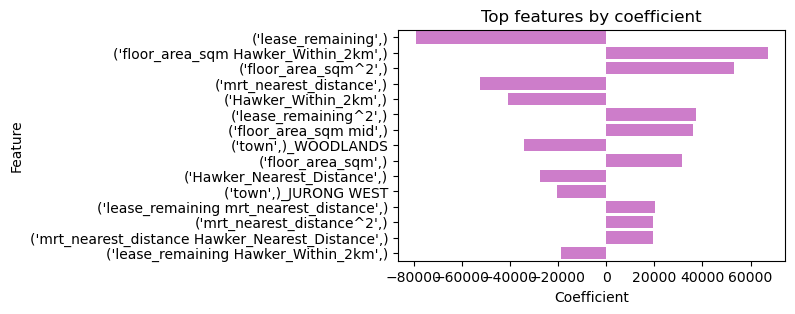

In [86]:
ols2_coeffs = pd.DataFrame({
    'Feature' : X2.columns,
    'Coefficient' : lr2.coef_,
    'Absolute Coefficient' : np.abs(lr2.coef_)
})

ols2_sorted_coeffs = ols2_coeffs.sort_values('Absolute Coefficient', ascending=False).head(15)

fix, ax = plt.subplots(figsize=(5,3))
sns.barplot(data=ols2_sorted_coeffs, x='Coefficient', y='Feature', orient='h', color='orchid').set_title("Top features by coefficient");

Interaction between features:

1) floor_area_sqm & mid
2) lease_remaining & mrt_nearest_distance
3) mrt_nearest_distance & hawker_nearest_distance
4) lease_remaining & hawker_within_2km

Interaction within feature:

1) floor_area_sqm
2) lease_remaining
3) mrt_nearest_distance

## Conclusions

Using the OLS model, we want to identify the key features which affects the resale prices. For linear regression models, the coefficient of each feature can be interpreted as the direct impact to the predicted outcome. Hence, we will identify the key features by looking at the features with the highest absolute coefficients in our prediction model. Hence, the key features that affect the resale price of a HDB are:

1) Floor area
2) Lease remaining
3) Hawker within 2km
4) Mrt nearest distance
5) Mid 
6) Hawker nearest distance
7) Town

## Apply model to test data

In [87]:
# Read data

house_test = pd.read_csv('../datasets/test.csv')

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_1957/2717158351.py:3: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  house_test = pd.read_csv('../datasets/test.csv')


In [88]:
# Check for missing values

house_test.isnull().sum()

id                   0
Tranc_YearMonth      0
town                 0
flat_type            0
block                0
                    ..
sec_sch_name         0
cutoff_point         0
affiliation          0
sec_sch_latitude     0
sec_sch_longitude    0
Length: 76, dtype: int64

In [89]:
# Replace missing values

house_test['Hawker_Within_2km'].fillna(0.0, inplace = True)

In [90]:
# Check that replacement is successful

house_test.isnull().sum()

id                   0
Tranc_YearMonth      0
town                 0
flat_type            0
block                0
                    ..
sec_sch_name         0
cutoff_point         0
affiliation          0
sec_sch_latitude     0
sec_sch_longitude    0
Length: 76, dtype: int64

In [91]:
#Feature Engineering
house_test['lease_remaining']=house_test['Tranc_Year'] - house_test['lease_commence_date']

In [92]:
#keep features needed
X_test = house_test[['floor_area_sqm', 'lease_remaining', 'Hawker_Within_2km', 
                'mrt_nearest_distance', 'mid', 'Hawker_Nearest_Distance']]

In [93]:
# Preview data

X_test.head()

,floor_area_sqm,lease_remaining,Hawker_Within_2km,mrt_nearest_distance,mid,Hawker_Nearest_Distance
0,84.0,25,1.0,686.660434,8,687.576779
1,112.0,11,0.0,169.478175,5,2122.346226
2,68.0,33,11.0,694.220448,8,152.287621
3,97.0,38,2.0,1117.203587,2,501.892158
4,103.0,31,2.0,987.976010,17,437.593564


In [94]:
# Create interaction features
X_test_overfit = poly.fit_transform(X_test)

In [95]:
poly_test_names = poly.get_feature_names(X_test.columns)

/opt/homebrew/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [96]:
X_test_overfit.shape

(16737, 27)

In [97]:
X_test = pd.DataFrame(X_test_overfit, columns = [poly_names])

In [98]:
# Add in town for X

temp_test = pd.read_csv('../datasets/test.csv')
X_test['town'] = temp_test['town']

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_1957/3986582234.py:3: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_test = pd.read_csv('../datasets/test.csv')


In [99]:
# Dummy code for town

X_test = pd.get_dummies(X_test,
                       columns=['town'],
                       drop_first = True)

/var/folders/3n/fkv2x4vs6_jc1rvhs53fssxr0000gn/T/ipykernel_1957/230168209.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_test = pd.get_dummies(X_test,


In [100]:
# Scale data

X_test_ss = ss.transform(X_test)

/opt/homebrew/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [101]:
# Create prediction column

house_test['Predicted'] = lr2.predict(X_test_ss)

In [102]:
# Create dataset for kaggle submission

submission = house_test[['id','Predicted']]

In [103]:
submission.head()

,id,Predicted
0,114982,349563.749712
1,95653,505094.302873
2,40303,334947.737986
3,109506,250714.642397
4,100149,462473.494120


In [104]:
submission.rename(columns = {"id":"Id"})

,Id,Predicted
0,114982,349563.749712
1,95653,505094.302873
2,40303,334947.737986
3,109506,250714.642397
4,100149,462473.494120
...,...,...
16732,23347,376809.465444
16733,54003,488262.176646
16734,128921,406735.101656
16735,69352,467214.951563


In [105]:
submission.to_csv('../datasets/kaggle_sub.csv', index=False)

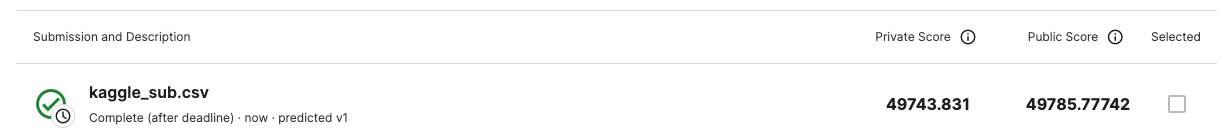